In [64]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
import biom
import pandas as pd
from sklearn.svm import SVC

Automatically created module for IPython interactive environment


In [84]:
# Import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

m = pd.read_csv("/Users/shwetakinger/Desktop/ERSP_data/merged_bmi_mapping_final__original_study_Yatsunenko_GG__.txt", sep="\t", index_col=0)
m.columns

Index(['BarcodeSequence', 'LinkerPrimerSequence', 'BMI', 'bmi_group_binned',
       'bmi_group_coded', 'original_study', 'combined_study_bmi_group',
       'PCR_PRIMERS', 'TARGET_SUBFRAGMENT', 'AGE', 'ELEVATION', 'LONGITUDE',
       'COUNTRY', 'SEQUENCING_METH', 'SAMPLE_CENTER', 'Description_duplicate',
       'ReversePrimer', 'COLLECTION_DATE', 'SEX', 'FAMILY_RELATIONSHIP_GG',
       'STUDY_CENTER', 'EXPERIMENT_CENTER', 'bmi_group_amish', 'RUN_CENTER',
       'LATITUDE', 'Description'],
      dtype='object')

In [66]:
X = biom.load_table("/Users/shwetakinger/Desktop/newtables/Yat.biom")
#y = m.bmi_group_coded

In [114]:
y = m[m.bmi_group_coded != "Overweight"].index
y_2 = m[m.bmi_group_coded != "Overweight"]

y_2.loc[y_2.bmi_group_binned == 3, 'bmi_group_binned'] = 0
#print(y_2.bmi_group_binned)

#how  many samples are lean 
#print(y_2)
y_2[y_2.bmi_group_binned == 1]  #178 are lean

y_2[y_2.bmi_group_binned == 0]  #50 are obese

/Users/shwetakinger/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,BarcodeSequence,LinkerPrimerSequence,BMI,bmi_group_binned,bmi_group_coded,original_study,combined_study_bmi_group,PCR_PRIMERS,TARGET_SUBFRAGMENT,AGE,...,ReversePrimer,COLLECTION_DATE,SEX,FAMILY_RELATIONSHIP_GG,STUDY_CENTER,EXPERIMENT_CENTER,bmi_group_amish,RUN_CENTER,LATITUDE,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
AmzC29adltF.418659,TAGATAGCAGGA,CCGGACTACHVGGGTWTCTAAT,33.2,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,38.0,...,no_data,NaN,female,NaN,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
AmzC2adltF.418621,TACATCACCACA,CCGGACTACHVGGGTWTCTAAT,31.7,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,24.0,...,no_data,NaN,female,Mother,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
AmzC30adltF.418737,GTAGATGCTTCG,CCGGACTACHVGGGTWTCTAAT,32.0,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,38.0,...,no_data,NaN,female,NaN,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
AmzC31adltF.418549,TAGTCGTCTAGT,CCGGACTACHVGGGTWTCTAAT,30.4,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,21.0,...,no_data,NaN,female,NaN,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
AmzC4adltF.418372,TACGATGACCAC,CCGGACTACHVGGGTWTCTAAT,34.9,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,31.0,...,no_data,NaN,female,Mother,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
AmzC7adltF.418582,GGCGACATGTAC,CCGGACTACHVGGGTWTCTAAT,31.6,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,38.0,...,no_data,NaN,female,Mother,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
AmzC8adltM.418389,GTCATATCGTAC,CCGGACTACHVGGGTWTCTAAT,34.9,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,83.2,...,no_data,NaN,male,Father,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
AmzC9adltF.418726,GTGACTGCGGAT,CCGGACTACHVGGGTWTCTAAT,31.7,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,29.0,...,no_data,NaN,female,Daughter,CGS-GL,CGS-GL,no_data,CGS-GL,5.410833,Human gut microbiome differentiation viewed ac...
h47M.1.418653,GTTGACGACAGC,CCGGACTACHVGGGTWTCTAAT,31.6,0,Obese,Yatsunenko_GG,Obese_Yatsunenko_GG,FWD:TTACCGCGGCKGCTGGCAC;REV:GGACTACHVGGGTWTCTAAT,V4,NaN,...,no_data,NaN,female,Mother,CGS-GL,CGS-GL,no_data,CGS-GL,-15.300000,Human gut microbiome differentiation viewed ac...


In [115]:
m.index

Index(['AmzC26chldF.418710', 'AmzC27teenF.418647', 'AmzC28chldM.418506',
       'AmzC4chldF.418677', 'AmzC5adltF.418439', 'AmzC9adltM.418480',
       'F3T1pre4.418699', 'F3T2pre4.418583', 'F4T2pre4.418418',
       'h101M.1.418586',
       ...
       'USygt47.F.418643', 'USygt48.F.418551', 'USygt5.F.418630',
       'USygt5.M.418357', 'USygt5.T1.418573', 'USygt5.T2.418805',
       'USygt50.F.418499', 'USygt52.F.418555', 'USygt54.F.418487',
       'USygt8.M.418616'],
      dtype='object', name='#SampleID', length=273)

In [116]:
p = pd.DataFrame(X.matrix_data.T.todense().astype(int), index=X.ids(axis="sample"), columns=X.ids(axis="observation"))


In [117]:
c = p.loc[y, :]
print(c)

                    191393  193061  174924  189110  1110988  180771  177228  \
#SampleID                                                                     
AmzC26chldF.418710       0       0       0       0        0       0       0   
AmzC27teenF.418647       0       0       0       0        0       0       0   
AmzC28chldM.418506       0       0       0       0        0       1       0   
AmzC4chldF.418677        0       0       0       0        0       0       0   
AmzC5adltF.418439        0       0       0       0        0       0       0   
AmzC9adltM.418480        0       0       0       0        0       0       0   
F3T1pre4.418699          0       0       0       0        0       0       0   
F3T2pre4.418583          0       0       0       0        0       0       0   
F4T2pre4.418418          0       0       0       0        0       0       0   
h101M.1.418586           0       0       0       0        0       0       0   
h10M.1.418706            0       0       0       0  

In [118]:
#Split data into test, train, validation sets (60% training, 20% test, 20% validation)
#X_train, X_test, y_train, y_test = train_test_split(c.fillna(0).as_matrix(), y_2.treatment, test_size=0.50)
X_train, X_test, y_train, y_test = train_test_split(c.fillna(0).as_matrix(), y_2.bmi_group_binned,random_state=0)


In [119]:
# Learn to predict each class against the other
classifier = RandomForestClassifier(max_features='sqrt', min_samples_split=2, n_estimators=100, max_depth=4, min_samples_leaf=10, random_state=1)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [120]:
#0 is obese 
y_pred_prob = classifier.predict_proba(X_test)[:, 0]

#can make 2 graphs with 0 and 1

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


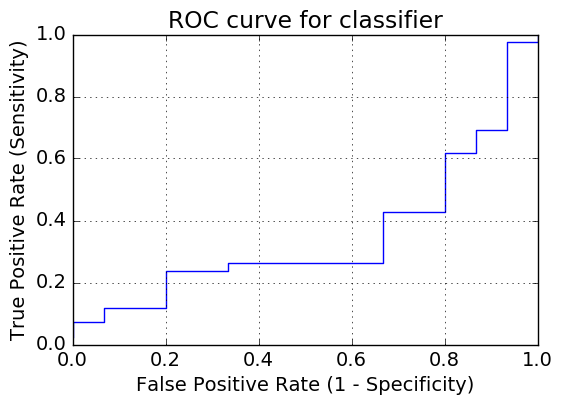

In [122]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [123]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.349206349206


In [124]:
#this value should match the results in the group log
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, c.fillna(0).as_matrix(), y_2.bmi_group_binned, cv=10, scoring='roc_auc').mean()

0.68045751633986939

In [97]:
#classifier.predict(X_test)[0:10]